In [1]:
# Needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import median
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb

In [2]:
# Import dataset

fetal = pd.read_csv('fetal_health.csv')

display(fetal)
list(fetal.columns)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency',
 'fetal_health']

In [3]:
# Remove the variables that are not going to be used.

fetal = fetal.drop(['histogram_width', 'histogram_number_of_zeroes', 'histogram_tendency'], axis=1)

display(fetal)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_min,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,62.0,126.0,2.0,120.0,137.0,121.0,73.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,68.0,198.0,6.0,141.0,136.0,140.0,12.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,68.0,198.0,5.0,141.0,135.0,138.0,13.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,53.0,170.0,11.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,53.0,170.0,9.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,137.0,177.0,4.0,153.0,150.0,152.0,2.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,103.0,169.0,6.0,152.0,148.0,151.0,3.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,103.0,170.0,5.0,153.0,148.0,152.0,4.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,103.0,169.0,6.0,152.0,147.0,151.0,4.0,2.0


In [4]:
# Checking for any NAN values

fetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
fetal.iloc[:,:-1].describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_min,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,93.579492,164.025400,4.068203,137.452023,134.610536,138.090310,18.808090
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,29.560212,17.944183,2.949386,16.381289,15.593596,14.466589,28.977636
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,50.000000,122.000000,0.000000,60.000000,73.000000,77.000000,0.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,67.000000,152.000000,2.000000,129.000000,125.000000,129.000000,2.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,93.000000,162.000000,3.000000,139.000000,136.000000,139.000000,7.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,120.000000,174.000000,6.000000,148.000000,145.000000,148.000000,24.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,159.000000,238.000000,18.000000,187.000000,182.000000,186.000000,269.000000


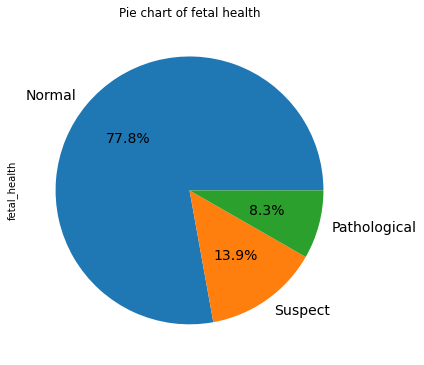

In [6]:
# Distribution of the outcome variable

df2 = fetal.copy(deep=True)
pie1  =pd.DataFrame(df2['fetal_health'].replace(1.0,'Normal').replace(2.0,'Suspect').replace(3.0,'Pathological').value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Pie chart of fetal health',y = 'fetal_health', 
          autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=14, figsize=(6,8))



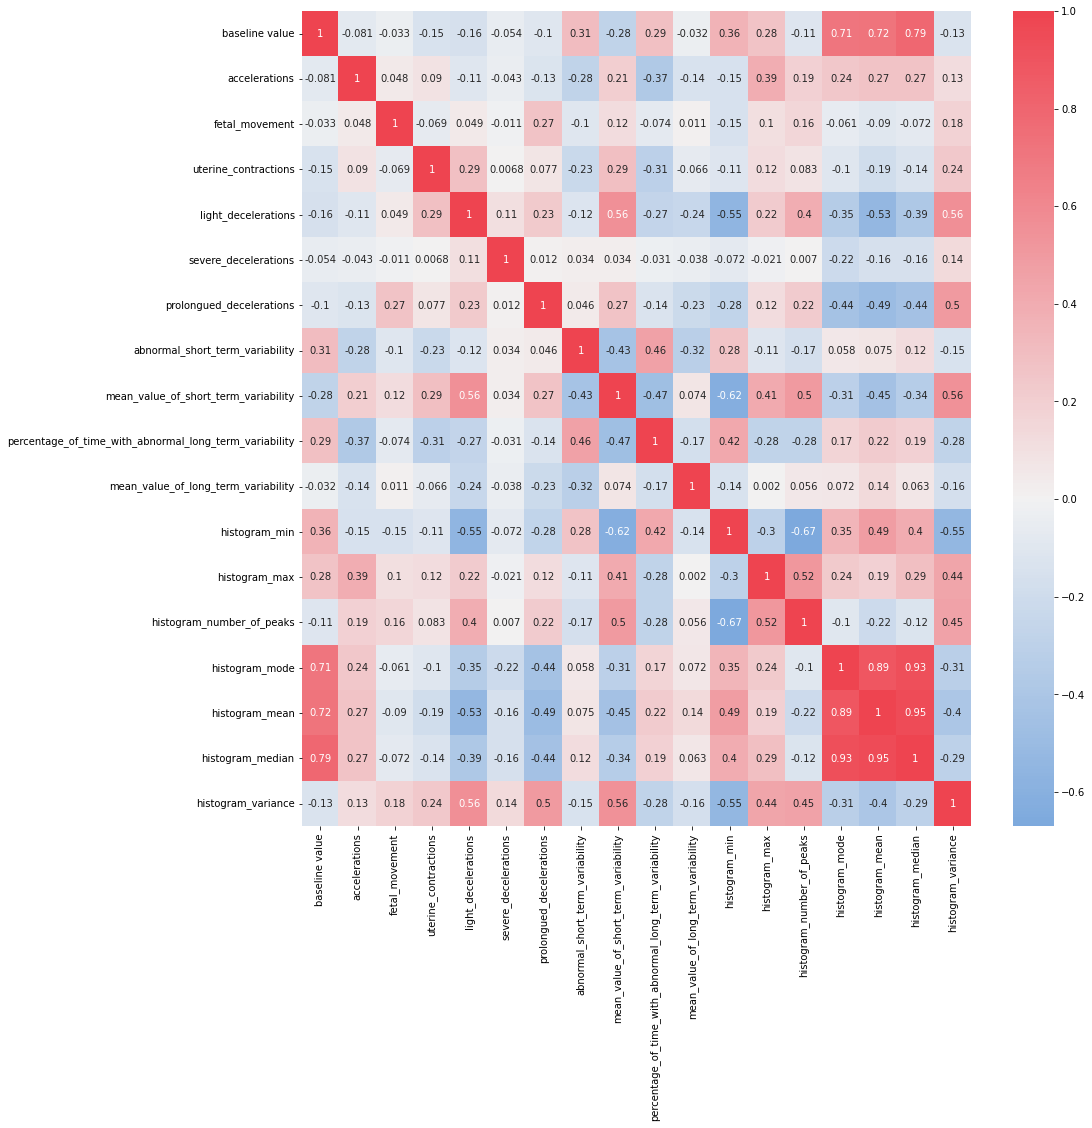

In [7]:
# Check the correlation between the independant variables.

fetal_variables = fetal.iloc[:,:-1]

#correlation matrix
corrmat= fetal_variables.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [8]:
# STATISTICAL ASSUMPTIONS.

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


calc_vif(fetal_variables)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,variables,VIF
0,baseline value,1058.326250
1,accelerations,4.744047
2,fetal_movement,1.177312
3,uterine_contractions,4.014756
4,light_decelerations,4.779204
5,severe_decelerations,1.135573
6,prolongued_decelerations,2.925780
7,abnormal_short_term_variability,15.972683
8,mean_value_of_short_term_variability,9.430380
9,percentage_of_time_with_abnormal_long_term_var...,2.414848


In [9]:
# Removing variables with high correlation higher than 0.7

fetal_variables2 = fetal_variables.drop(['histogram_mode', 'histogram_mean', 'histogram_median',
                                         'histogram_min', 'histogram_max', 'baseline value'], axis=1)


# 'abnormal_short_term_variability' 'baseline value'

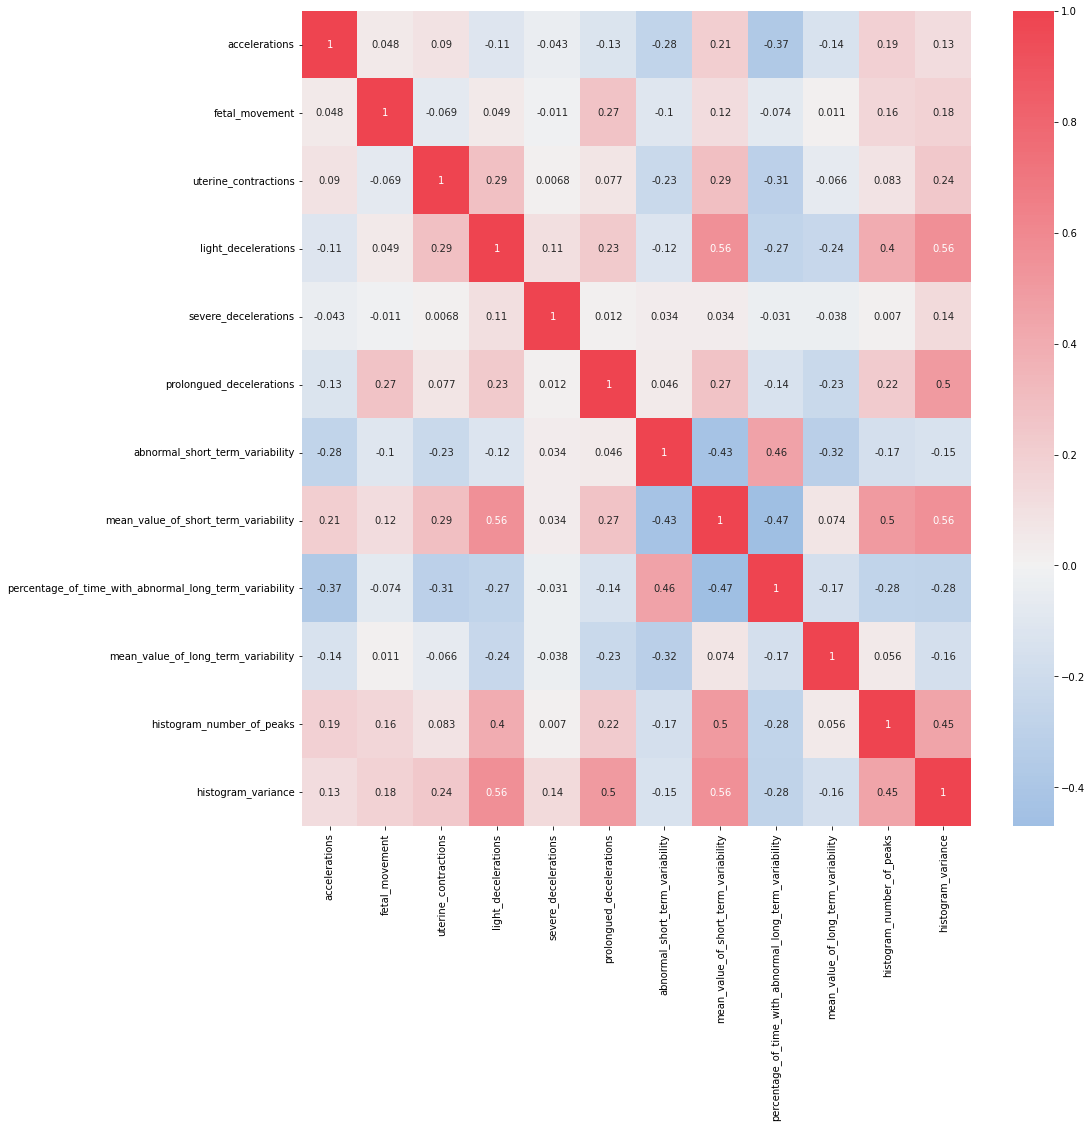

In [10]:
# Correlation without eliminated variables

corrmat= fetal_variables2.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [11]:
calc_vif(fetal_variables2)

,variables,VIF
0,accelerations,2.553318
1,fetal_movement,1.166524
2,uterine_contractions,3.364778
3,light_decelerations,3.487572
4,severe_decelerations,1.042720
5,prolongued_decelerations,1.869017
6,abnormal_short_term_variability,5.637311
7,mean_value_of_short_term_variability,7.357879
8,percentage_of_time_with_abnormal_long_term_var...,2.129041
9,mean_value_of_long_term_variability,3.640343


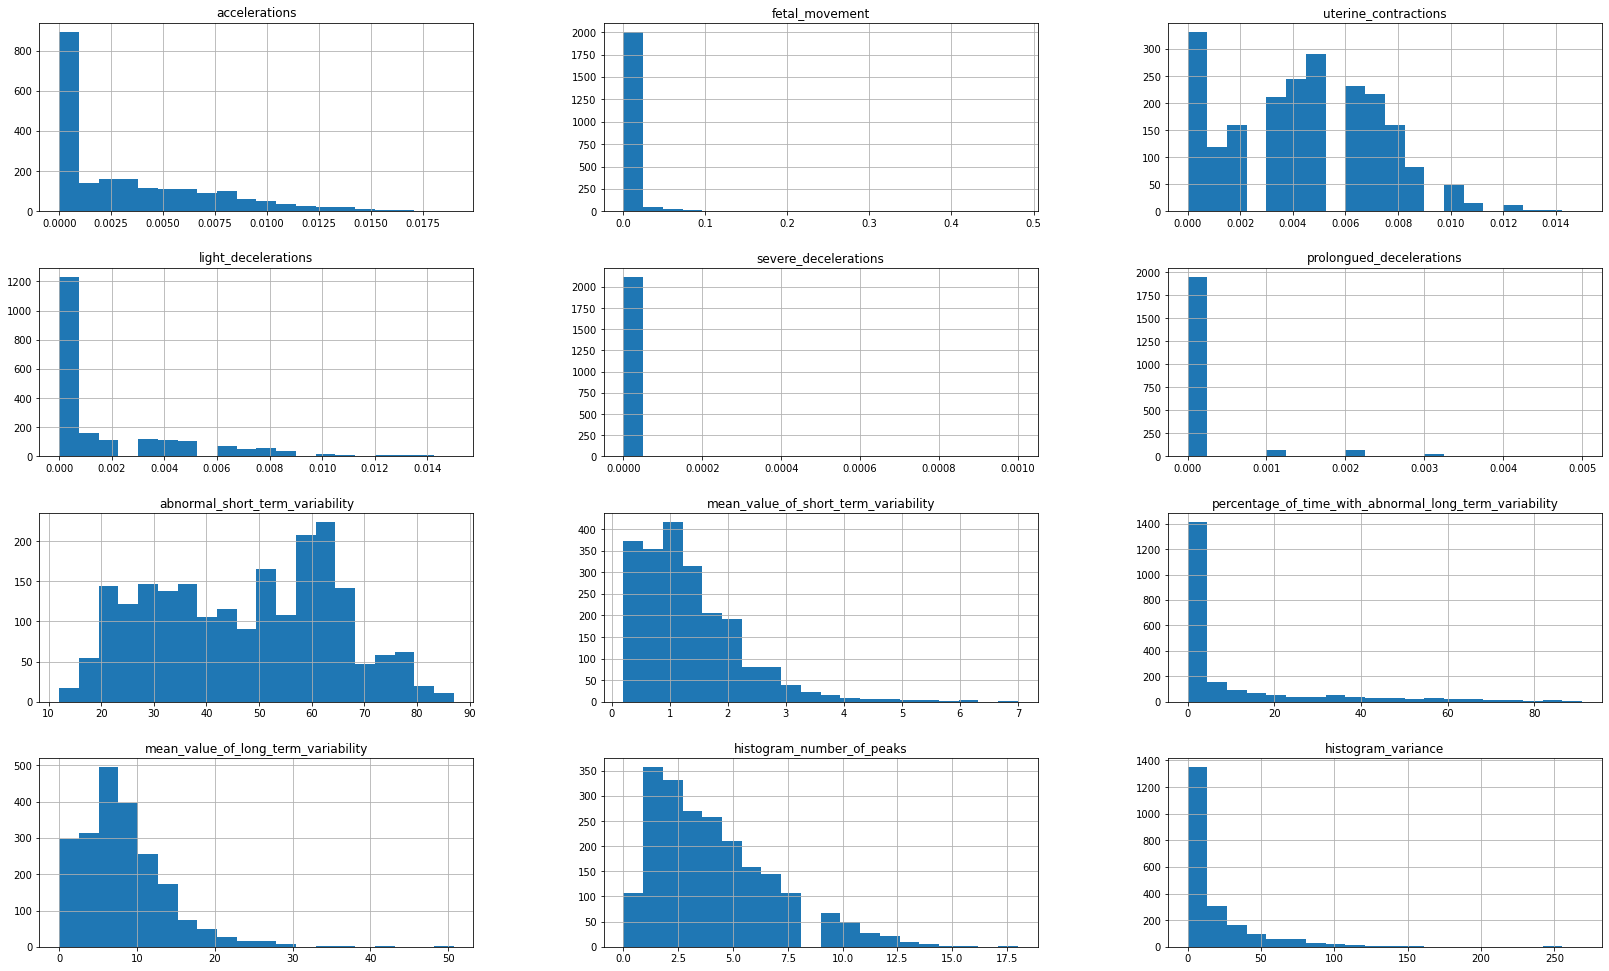

In [12]:
#Distribution of the remaining variables
fetal_variables2.hist(figsize=(28,17), bins = 20)
plt.show()

In [13]:
fetal = fetal.drop(['histogram_mode', 'histogram_mean', 'histogram_median',
                                         'histogram_min', 'histogram_max', 'baseline value'], axis=1)

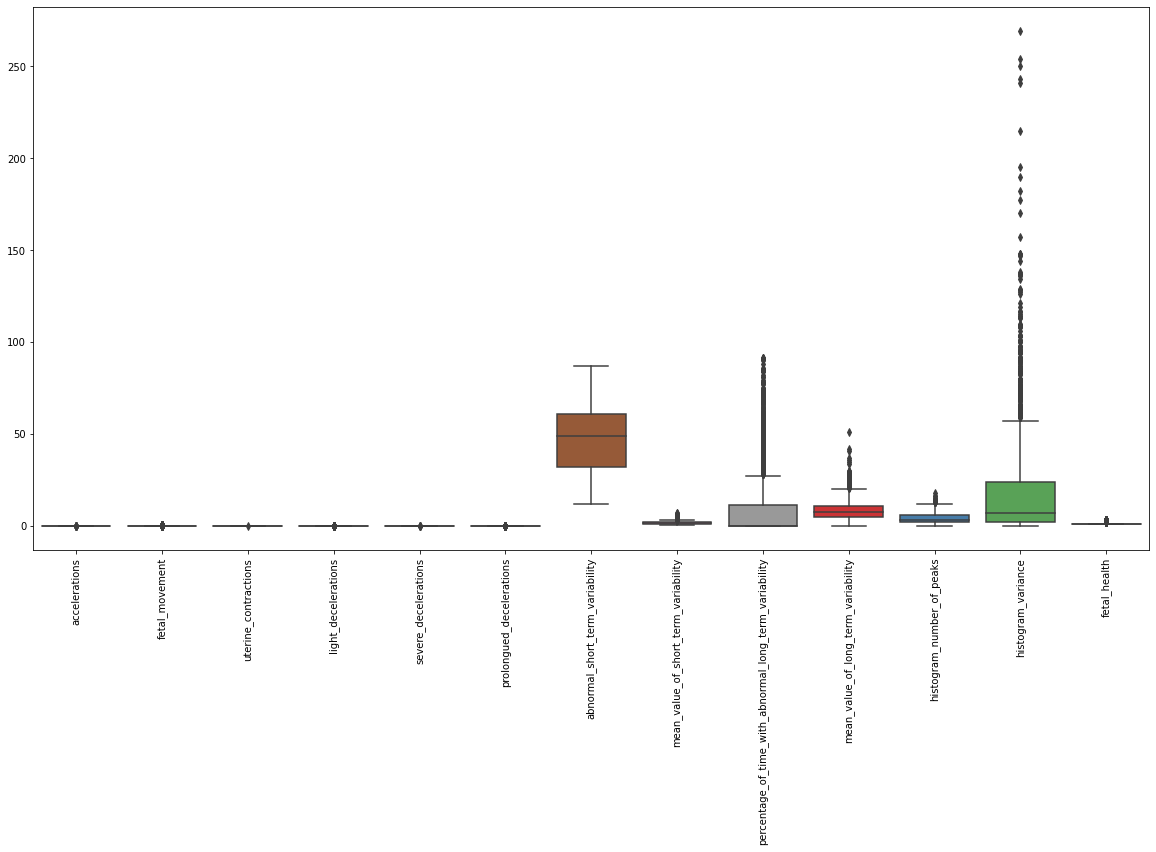

In [14]:
# Review of outliers

plt.figure(figsize=(20,10))
sns.boxplot(data = fetal,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [15]:
# Construction of the first model

X = fetal.iloc[:,:-1]
Y = fetal['fetal_health']

train_size, num_features = X.shape
num_labels = 3

# Standard Scaler to normalize the input features.
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
accelerations,2126.0,-1.803982e-16,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.958452e-15,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-2.625683e-15,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.127706e-15,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,7.254767e-16,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,4.324961e-15,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,2.687304e-16,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,-2.481552e-16,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,2.291362e-15,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293
mean_value_of_long_term_variability,2126.0,1.029959e-15,1.000235,-1.455081,-0.637583,-0.139975,0.464263,7.555172


In [16]:
# Model

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

lr_model= linear_model.LogisticRegression(solver='lbfgs',multi_class='multinomial')

lr_model.fit(X_train, Y_train)

# Review scores

predictions=lr_model.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, predictions)
recall = metrics.recall_score(Y_test, predictions, average="weighted")
precision = metrics.precision_score(Y_test, predictions, average="weighted")
cf_matrix = metrics.confusion_matrix(Y_test, predictions)

print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix: ")
print(cf_matrix)

Accuracy    :  0.8450704225352113
Recall      :  0.8450704225352113
Precision   :  0.8278367146853958
Confusion Matrix: 
[[327  10   6]
 [ 30  20   0]
 [ 15   5  13]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
# Comparison with other models

model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {
          "KNN" : KNeighborsClassifier(),
          "DT" :  DecisionTreeClassifier(),
          'RFC' : RandomForestClassifier(),
          'GBC' : GradientBoostingClassifier(),
          'XGB' : XGBClassifier()
          }

for test, clf in models.items():
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(Y_test,Y_pred)
    train_pred = clf.predict(X_train)
    train_acc = metrics.accuracy_score(Y_train, train_pred)
    print("\n", test + ' scores')
    print(acc)
    print(metrics.classification_report(Y_test,Y_pred))
    print(metrics.confusion_matrix(Y_test,Y_pred))
    print('*' * 100,"\n")
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)


 KNN scores
0.9131455399061033
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95       343
         2.0       0.76      0.64      0.70        50
         3.0       0.83      0.76      0.79        33

    accuracy                           0.91       426
   macro avg       0.84      0.79      0.81       426
weighted avg       0.91      0.91      0.91       426

[[332   6   5]
 [ 18  32   0]
 [  4   4  25]]
**************************************************************************************************** 


 DT scores
0.9131455399061033
              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       343
         2.0       0.68      0.72      0.70        50
         3.0       0.93      0.85      0.89        33

    accuracy                           0.91       426
   macro avg       0.85      0.84      0.85       426
weighted avg       0.91      0.91      0.91       426

[[325  16   2]
 [ 14  36  

In [18]:
#Sorting of Models

model_accuracy.sort_values(ascending=False, by = 'Accuracy')

,Model,Accuracy,Train_acc
2,RFC,0.955399,0.998235
4,XGB,0.950704,0.964706
3,GBC,0.946009,0.978235
0,KNN,0.913146,0.919412
1,DT,0.913146,0.998824


Accuracy is:  0.9553990610328639

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       343
         2.0       0.90      0.74      0.81        50
         3.0       0.97      0.94      0.95        33

    accuracy                           0.96       426
   macro avg       0.94      0.89      0.91       426
weighted avg       0.95      0.96      0.95       426

Confusion Matrix: 




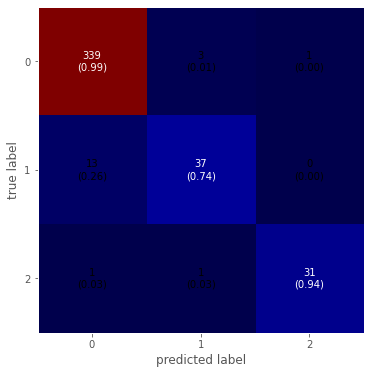

In [19]:
# Re-do the model with the best option

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)

Y_pred = rf_model.predict(X_test)

labels=['Test', 'Tesst', 'Teesstt']

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred))

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm,figsize=(8,6),show_normed=True, cmap='seismic')

evaluator(Y_test, Y_pred)

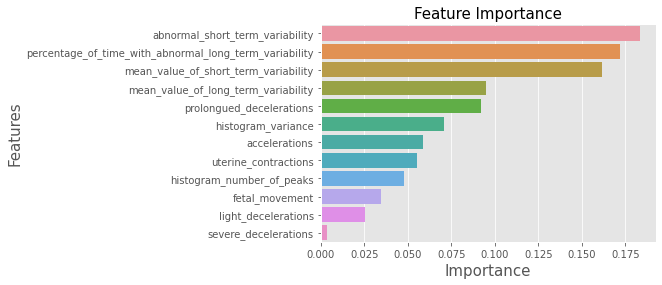

                                             Features  Importance
6                     abnormal_short_term_variability    0.183152
8   percentage_of_time_with_abnormal_long_term_var...    0.171981
7                mean_value_of_short_term_variability    0.161837
9                 mean_value_of_long_term_variability    0.094757
5                            prolongued_decelerations    0.092038
11                                 histogram_variance    0.070861
0                                       accelerations    0.058700
2                                uterine_contractions    0.055317
10                          histogram_number_of_peaks    0.048058
1                                      fetal_movement    0.034723
3                                 light_decelerations    0.025187
4                                severe_decelerations    0.003388


In [20]:
# Review of the importance of the independant variables

important_features = pd.DataFrame({'Features': X.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()
print(important_features)